# Olympics dataset EDA

---------------------------------------

## Step 1: Importing and reading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bios = pd.read_csv("./clean-data/bios-cleaned.csv")
results = pd.read_csv("./clean-data/results.csv")
nocs = pd.read_csv("./clean-data/noc_regions.csv")
popl = pd.read_csv("./clean-data/populations.csv")

## Step 2: Data understanding

In [3]:
# bios
bios.head()

,athlete_id,name,Sex,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,Male,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,Male,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,Male,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,Male,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,Male,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


In [4]:
print(bios.info())
bios.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145500 entries, 0 to 145499
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   athlete_id    145500 non-null  int64  
 1   name          145500 non-null  object 
 2   Sex           145500 non-null  object 
 3   born_date     143693 non-null  object 
 4   born_city     103109 non-null  object 
 5   born_region   103109 non-null  object 
 6   born_country  103109 non-null  object 
 7   NOC           145499 non-null  object 
 8   height_cm     106651 non-null  float64
 9   weight_kg     103181 non-null  float64
 10  died_date     33940 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 12.2+ MB
None


,athlete_id,height_cm,weight_kg
count,145500.000000,106651.000000,103181.000000
mean,73686.188955,176.333724,71.917776
std,42868.960158,10.380282,14.495961
min,1.000000,127.000000,25.000000
25%,36663.750000,170.000000,62.000000
50%,73302.500000,176.000000,70.000000
75%,110306.250000,183.000000,80.000000
max,149814.000000,226.000000,198.000000


In [5]:
# results
results.head()

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,17.0,True,NaN
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,NaN
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,32.0,True,NaN
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,NaN
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,NaN


In [6]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308408 entries, 0 to 308407
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   year        305807 non-null  float64
 1   type        305807 non-null  object 
 2   discipline  308407 non-null  object 
 3   event       308408 non-null  object 
 4   as          308408 non-null  object 
 5   athlete_id  308408 non-null  int64  
 6   noc         308407 non-null  object 
 7   team        121714 non-null  object 
 8   place       283193 non-null  float64
 9   tied        308408 non-null  bool   
 10  medal       44139 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(7)
memory usage: 23.8+ MB


In [7]:
# Noc
nocs.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [8]:
popl.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0
1,Africa Eastern and Southern,AFE,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0
2,Afghanistan,AFG,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0
3,Africa Western and Central,AFW,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,502789511.0
4,Angola,AGO,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,36684202.0


## Step 3: Data cleaning and preparation

## Step 4: EDA

* Ask questions

### How many medals each country won since 1896?

In [9]:
results.head(10)

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,17.0,True,NaN
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,NaN
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,32.0,True,NaN
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,NaN
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,NaN
5,1996.0,Summer,Tennis,"Singles, Men (Olympic)",Arnaud Boetsch,2,FRA,NaN,17.0,True,NaN
6,1996.0,Summer,Tennis,"Doubles, Men (Olympic)",Arnaud Boetsch,2,FRA,Guillaume Raoux,17.0,True,NaN
7,1924.0,Summer,Tennis,"Singles, Men (Olympic)",Jean Borotra,3,FRA,NaN,4.0,False,NaN
8,1924.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean Borotra,3,FRA,Marguerite Billout,15.0,True,NaN
9,1924.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean Borotra,3,FRA,René Lacoste,3.0,False,Bronze


In [10]:
# getting all rows except NaN rows in medal column

medal = results[results["medal"].notna()]
medal.head()

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
9,1924.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean Borotra,3,FRA,René Lacoste,3.0,False,Bronze
12,1924.0,Summer,Tennis,"Doubles, Men (Olympic)",Jacques Brugnon,4,FRA,Henri Cochet,2.0,False,Silver
14,1912.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Albert Canet,5,FRA,Marguerite Broquedis,3.0,False,Bronze
15,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Albert Canet,5,FRA,Édouard Mény de Marangue,3.0,False,Bronze
21,2000.0,Summer,Table Tennis,"Doubles, Men (Olympic)",Patrick Chila,7,FRA,Jean-Philippe Gatien,3.0,False,Bronze


In [11]:
# double counting of medals of athlets in same team

# results[(results['discipline'].str.contains("Basketball", na=False)) & (results['year']==2020)]

In [12]:
# need to deal with the double counting of medals which is making medal count too large.

# drop duplicate rows which has same values
medals_filter = medal.drop_duplicates(['year','type','discipline','event','noc','medal'])
medals_filter.head()

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
9,1924.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean Borotra,3,FRA,René Lacoste,3.0,False,Bronze
12,1924.0,Summer,Tennis,"Doubles, Men (Olympic)",Jacques Brugnon,4,FRA,Henri Cochet,2.0,False,Silver
14,1912.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Albert Canet,5,FRA,Marguerite Broquedis,3.0,False,Bronze
15,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Albert Canet,5,FRA,Édouard Mény de Marangue,3.0,False,Bronze
21,2000.0,Summer,Table Tennis,"Doubles, Men (Olympic)",Patrick Chila,7,FRA,Jean-Philippe Gatien,3.0,False,Bronze


In [13]:
medals_filter.groupby("noc")["medal"].value_counts().loc['MEX']

medal
Bronze    39
Silver    25
Gold      15
Name: count, dtype: int64

In [14]:
# Mexico didn't participated in 2010 and 2014 acc to wiki.
medal.query("(year==2010 or year==2014) & noc=='MEX'")

# reason : The event (YOG) Youth Olympic Games is an international multi-sport event for clean-data 
#          between 15 and 18 years old, organized by the International Olympic Committee.

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
264652,2014.0,Summer,Diving (Aquatics),"Team, Mixed Youth (YOG)",Alejandra Orozco,123301,MEX,Daniel Jensen,1.0,False,Gold
264653,2014.0,Summer,Diving (Aquatics),"Platform, Girls (YOG)",Alejandra Orozco,123301,MEX,NaN,3.0,False,Bronze
264662,2010.0,Summer,Diving (Aquatics),"Platform, Boys (YOG)",Iván García,123304,MEX,NaN,3.0,False,Bronze
286422,2014.0,Summer,Diving (Aquatics),"Springboard, Boys (YOG)",Rodrigo Diego,135128,MEX,NaN,2.0,False,Silver
286424,2014.0,Summer,Diving (Aquatics),"Platform, Boys (YOG)",Rodrigo Diego,135128,MEX,NaN,3.0,False,Bronze


___

In [15]:
# again getting all rows without NaN and YOG event
medal = results[(results['medal'].notna()) & (~results['event'].str.endswith("(YOG)"))]
medals_filter = medal.drop_duplicates(['year','type','discipline','event','noc','medal'])

In [16]:
medals_filter.query("(year==2010 or year==2014) & noc=='MEX'")
# all rows of column 'events' ending with (YOG) is removed

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal


In [17]:
medals_filter.groupby(["noc"])['medal'].value_counts().loc['USA']

medal
Gold      1191
Silver     962
Bronze     844
Name: count, dtype: int64

In [18]:
medals_filter.groupby(["noc","year"])['medal'].value_counts().loc['MEX']

year    medal 
1900.0  Bronze    1
1932.0  Silver    2
1936.0  Bronze    3
1948.0  Bronze    3
        Gold      2
        Silver    1
1952.0  Silver    1
1956.0  Bronze    1
        Gold      1
1960.0  Bronze    1
1964.0  Bronze    1
1968.0  Bronze    3
        Gold      3
        Silver    3
1972.0  Silver    1
1976.0  Bronze    1
        Gold      1
1980.0  Bronze    3
        Silver    1
1984.0  Silver    3
        Gold      2
        Bronze    1
1988.0  Bronze    2
1992.0  Silver    1
1996.0  Bronze    1
2000.0  Bronze    3
        Silver    2
        Gold      1
2004.0  Silver    3
        Bronze    1
2008.0  Bronze    2
        Gold      2
2012.0  Bronze    4
        Silver    3
        Gold      1
2016.0  Silver    3
        Bronze    2
2020.0  Bronze    3
Name: count, dtype: int64

## Can we visualize where each athlete was born ?

In [19]:
bios.head()

,athlete_id,name,Sex,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,Male,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,Male,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,Male,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,Male,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,Male,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


In [25]:
from geopy.geocoders import Nominatim
cache = {}

def get_coordinates(city, region):
    geolocator = Nominatim(user_agent="my_app")  # Replace "my_app" with your app name
    print(f"Processing {city}, {region}")
    key = f"{city}, {region}"
    if key in cache:
        return cache[key]
        
    location = geolocator.geocode(key)
    
    if location:
        latitude = location.latitude
        longitude = location.longitude
        cache[key] = (latitude, longitude)
        return latitude, longitude
    else:
        print("Location not found")
        return None

bios_locs = bios.copy()

bios_locs["lat"] = None
bios_locs["long"] = None

for index, row in bios.iterrows():
    coordinates = get_coordinates(row["born_city"], row["born_region"])
    if coordinates:
        lat, long = coordinates
        bios_locs.loc[index,"lat"] = lat
        bios_locs.loc[index,"long"] = long
        
    if index != 0 and index % 100 == 0:
        bios_locs.to_csv(f"./clean-data/updates_bios_{index}.csv", index=False)
        break
                

Processing Bordeaux, Gironde
Processing Meulan, Yvelines
Processing Biarritz, Pyrénées-Atlantiques
Processing Paris VIIIe, Paris
Processing Wandsworth, England
Processing Amiens, Somme
Processing Ris-Orangis, Essonne
Processing Villeurbanne, Rhône
Processing Nîmes, Gard
Processing Farges-Allichamps, Cher
Processing Orgeval, Yvelines
Processing Paris XVIe, Paris
Processing nan, nan
Processing nan, nan
Processing Vire, Calvados
Processing Paris VIIIe, Paris
Processing Casablanca, Casablanca-Settat
Processing Alès, Gard
Processing Vichy, Allier
Processing Paris XVIIe, Paris
Processing Paris Ie, Paris
Location not found
Processing Paris Xe, Paris
Processing Cantenac, Gironde
Processing Paris IIe, Paris
Processing Neuilly-sur-Seine, Hauts-de-Seine
Processing Lillers, Pas-de-Calais
Processing Montbéliard, Doubs
Processing nan, nan
Processing nan, nan
Processing Paris VIe, Paris
Processing Paris VIIIe, Paris
Processing Bagnols-sur-Cèze, Gard
Processing Barfleur, Manche
Processing Bordeaux, Gi

## Checking percentage of people are athlete from approx total population according to 2023

In [5]:
bios.head()

,athlete_id,name,Sex,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,Male,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,Male,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,Male,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,Male,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,Male,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


In [6]:
popl.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0
1,Africa Eastern and Southern,AFE,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0
2,Afghanistan,AFG,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0
3,Africa Western and Central,AFW,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,502789511.0
4,Angola,AGO,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,36684202.0


In [39]:
bios["born_date"] = pd.to_datetime(bios["born_date"])

# Getting recent athletes
# recent_athletes = bios[bios["born_date"].dt.year >= 2000]

# count of recent athletes born in the USA
athlete_count = bios[bios["born_country"] == "IND"]["athlete_id"].sum()

# Getting the population of the USA in 2023
population_2023 = int(popl[popl["Country Code"] == "IND"]["2023"].iloc[0])

percentage = (athlete_count / population_2023) * 100

print(f"{percentage} %")

2.2256843979367913 %


## No. of athletes for each country - Top 20 (Since 1896)

In [4]:
nof_athletes = bios.groupby("born_country")["athlete_id"].count().sort_values(ascending=False).head(20)

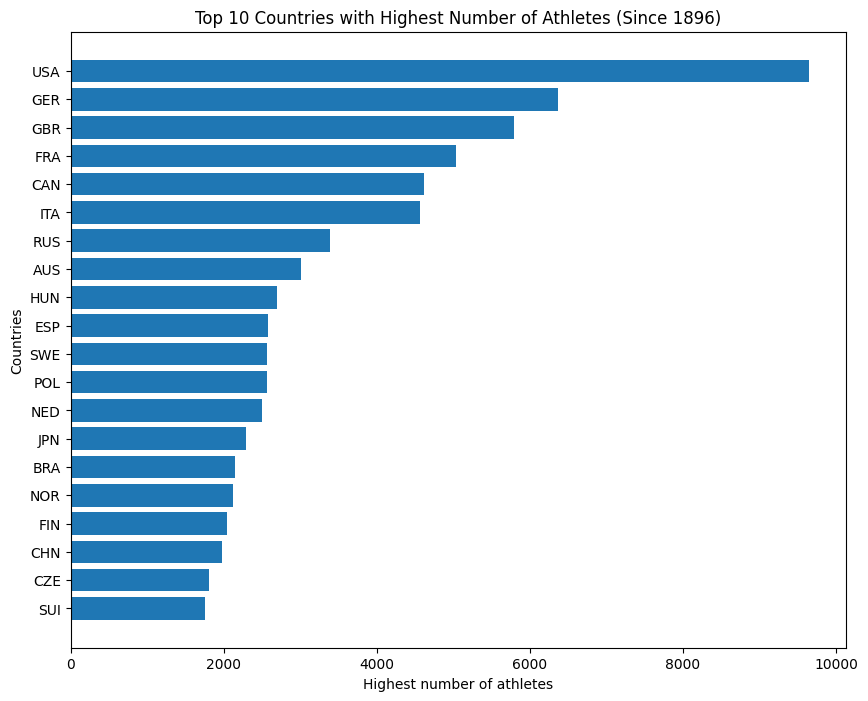

In [5]:
plt.figure(figsize=(10, 8))
plt.barh(nof_athletes.index, nof_athletes.values)
plt.xlabel('Highest number of athletes')
plt.ylabel('Countries')
plt.title('Top 10 Countries with Highest Number of Athletes (Since 1896)')
plt.gca().invert_yaxis()
plt.show()

## Displaying no. of participants for each year

In [7]:
results_gender = results.merge(bios, left_on="as", right_on="name", how="left")

In [61]:
results_gender = results_gender[~results_gender['event'].str.endswith("(YOG)")]

In [62]:
results_gender.head(50)
# results_gender.columns

,year,type,discipline,event,as,athlete_id_x,noc,team,place,tied,medal,Sex
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,17.0,True,NaN,Male
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,NaN,Male
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,32.0,True,NaN,Male
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,NaN,Male
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,NaN,Male
5,1996.0,Summer,Tennis,"Singles, Men (Olympic)",Arnaud Boetsch,2,FRA,NaN,17.0,True,NaN,Male
6,1996.0,Summer,Tennis,"Doubles, Men (Olympic)",Arnaud Boetsch,2,FRA,Guillaume Raoux,17.0,True,NaN,Male
7,1924.0,Summer,Tennis,"Singles, Men (Olympic)",Jean Borotra,3,FRA,NaN,4.0,False,NaN,Male
8,1924.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean Borotra,3,FRA,Marguerite Billout,15.0,True,NaN,Male
9,1924.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean Borotra,3,FRA,René Lacoste,3.0,False,Bronze,Male


In [63]:
results_gender = results_gender[['year', 'type', 'discipline', 'event', 'as', 'athlete_id_x', 'noc',
       'team', 'place', 'tied', 'medal', 'Sex']]

In [64]:
results_gender.columns

Index(['year', 'type', 'discipline', 'event', 'as', 'athlete_id_x', 'noc',
       'team', 'place', 'tied', 'medal', 'Sex'],
      dtype='object')

<Axes: xlabel='Sex'>

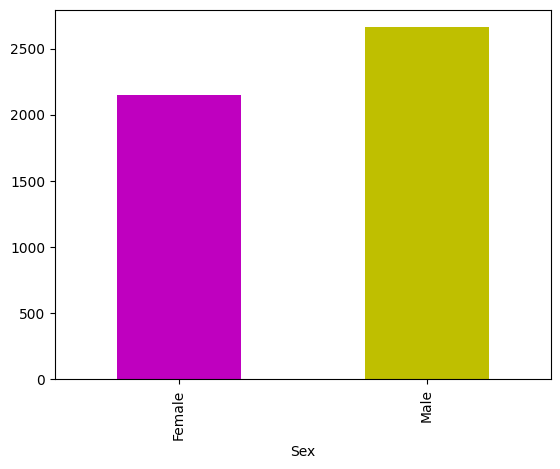

In [147]:
# Single year plot for participants
results_gender.groupby(["year"])["Sex"].value_counts().unstack().loc[2022].plot(kind="bar", color=["m","y"])
# change the value in loc for different year visuals

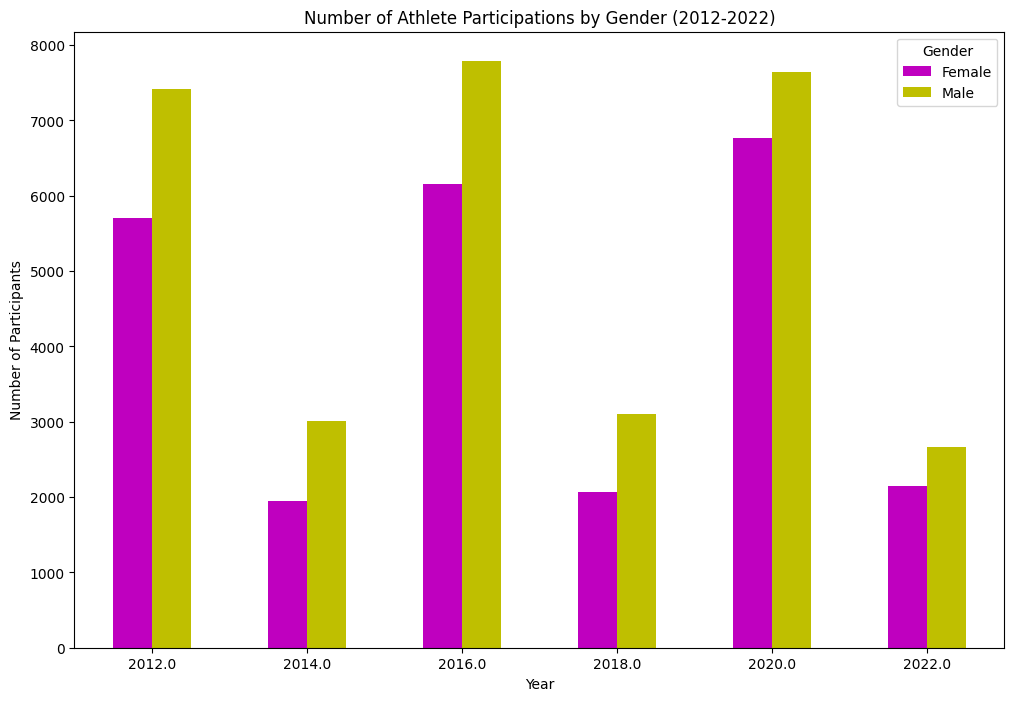

In [161]:
# Filtering for the desired 10-year period
# change the data according to get results for 10 years in series.
desired_years = results_gender[(results_gender['year'] >= 2012) & (results_gender['year'] <= 2022)]

# Group by year and gender and count the number of participations
participation_counts = desired_years.groupby(['year'])["Sex"].value_counts().unstack()

# Plotting the data for each year in the 10-year range
participation_counts.plot(kind='bar', figsize=(12, 8), stacked=False, color=['m', 'y'])
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.title('Number of Athlete Participations by Gender (2012-2022)')
plt.legend(title='Gender')
plt.xticks(rotation=0)  # Keeps the x-axis labels horizontal

plt.show()
